In [1]:
import pandas as pd

df = pd.read_csv('C:/Users/Lucas Silva/Documents/usp/TCC-CD-USP/archives/df_model_V2.csv')

df.head()

,companycode,ano,ativos_circulantes,passivos_circulantes,caixa_e_equivalentes_de_caixa,contas_a_receber,outros_ativos_circulantes,dívidas_financeiras,patrimônio_líquido,total_de_ativos,...,cobertura_de_juros,lucros_retidos_sobre_ativos,razao_posicao_cambial,crescimento_vendas,crescimento_ativos,crescimento_lucro_liquido,margem_ebitda,ebitda_sobre_juros,ebitda_sobre_divida,total_score
0,ADEL,2008,82082356.0,49511334.0,88076.0,56389229.0,2821376.0,10641195.0,46072746.0,98082909.0,...,-15.138544,0.168002,-0.016323,0.000000,0.000000,0.000000,0.376860,-21.215896,0.841152,5.340476
1,ADEL,2008,88600612.0,55983895.0,1541138.0,62226848.0,1997432.0,32215543.0,46225336.0,104699760.0,...,-9.706507,0.109677,0.001624,1.065531,0.067462,0.711261,0.337211,-12.439466,0.513515,6.838095
2,ADEL,2008,94009683.0,54753842.0,1363190.0,69019277.0,1386098.0,43477280.0,52235532.0,109560976.0,...,-6.473727,0.104810,-0.007108,0.534539,0.046430,0.570522,0.361901,-7.970070,0.626646,6.488095
3,ADEL,2008,45582654.0,8454967.0,12278966.0,3464419.0,2870280.0,3464939.0,49407277.0,60753401.0,...,-4.416966,0.189012,-0.032546,-0.006573,-0.445483,-0.170946,0.327860,-5.487912,7.076576,6.654762
4,ADEL,2009,82082356.0,49511334.0,88076.0,56389229.0,2821376.0,10641195.0,46072746.0,98082909.0,...,-15.138544,0.168002,-0.016323,-0.682419,0.614443,-0.551196,0.376860,-21.215896,0.841152,5.273810


In [2]:
#df=df.drop(columns=['ebitda'],axis=1)

In [3]:
df.isnull().sum()

companycode                                      0
ano                                              0
ativos_circulantes                               0
passivos_circulantes                             0
caixa_e_equivalentes_de_caixa                    0
contas_a_receber                                 0
outros_ativos_circulantes                        0
dívidas_financeiras                              0
patrimônio_líquido                               0
total_de_ativos                                  0
lucro_prejuízo_líquido_do_período                0
receita_de_vendas                                0
lucro_prejuízo_operacional_líquido               0
cogs                                             0
estoques                                         0
despesas_financeiras                             0
lucros_prejuízos_acumulados                      0
posição_cambial_líquida                          0
ebit                                             0
amortization                   

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

# Corr

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# Mapa de correlação das features.

df_corr = df.copy()
df_corr = df_corr.drop(columns=['companycode', 'ano'])

In [6]:
# Calculate correlation matrix
corr_matrix = df_corr.corr()

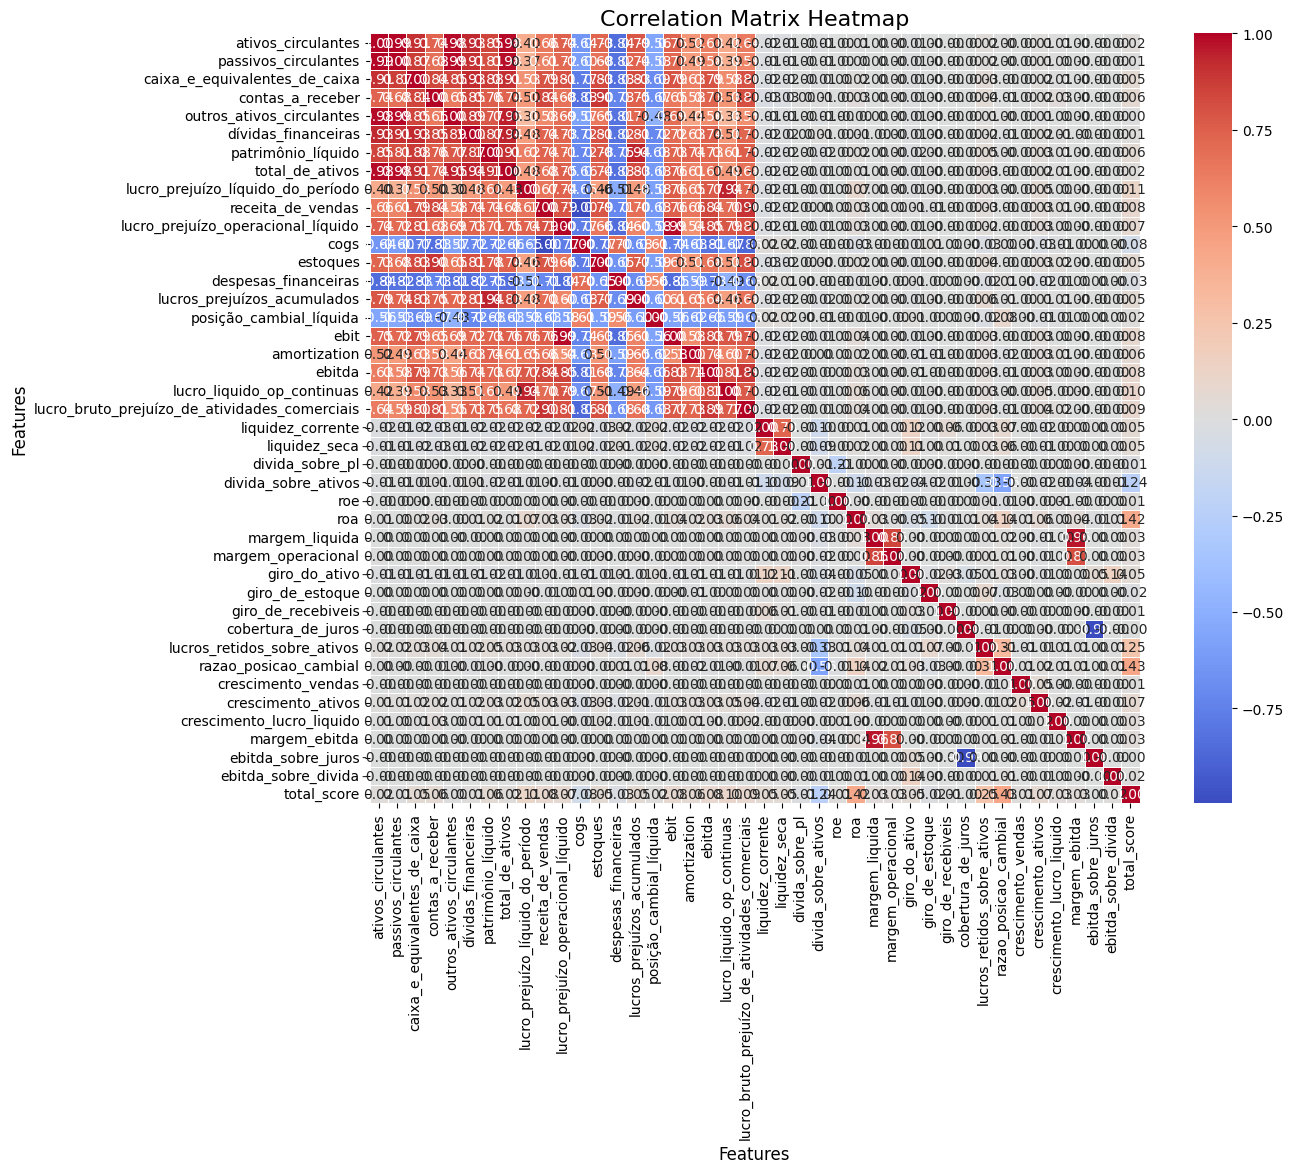

In [7]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, square=True, linewidths=.5)

# Titles and labels
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

plt.show()

In [8]:
corrs=corr_matrix.loc['total_score'].drop('total_score').sort_values(ascending=False)
corrs

razao_posicao_cambial                            0.434917
roa                                              0.418069
lucros_retidos_sobre_ativos                      0.250478
lucro_prejuízo_líquido_do_período                0.110243
lucro_liquido_op_continuas                       0.102262
lucro_bruto_prejuízo_de_atividades_comerciais    0.087410
ebitda                                           0.081455
receita_de_vendas                                0.080544
ebit                                             0.077254
lucro_prejuízo_operacional_líquido               0.068303
crescimento_ativos                               0.067527
amortization                                     0.061078
contas_a_receber                                 0.058468
patrimônio_líquido                               0.055871
liquidez_corrente                                0.054819
estoques                                         0.054533
lucros_prejuízos_acumulados                      0.054301
caixa_e_equiva

In [9]:
import phik
from phik import resources, report
phi_k_corr = df_corr.phik_matrix()

interval columns not set, guessing: ['ativos_circulantes', 'passivos_circulantes', 'caixa_e_equivalentes_de_caixa', 'contas_a_receber', 'outros_ativos_circulantes', 'dívidas_financeiras', 'patrimônio_líquido', 'total_de_ativos', 'lucro_prejuízo_líquido_do_período', 'receita_de_vendas', 'lucro_prejuízo_operacional_líquido', 'cogs', 'estoques', 'despesas_financeiras', 'lucros_prejuízos_acumulados', 'posição_cambial_líquida', 'ebit', 'amortization', 'ebitda', 'lucro_liquido_op_continuas', 'lucro_bruto_prejuízo_de_atividades_comerciais', 'liquidez_corrente', 'liquidez_seca', 'divida_sobre_pl', 'divida_sobre_ativos', 'roe', 'roa', 'margem_liquida', 'margem_operacional', 'giro_do_ativo', 'giro_de_estoque', 'giro_de_recebiveis', 'cobertura_de_juros', 'lucros_retidos_sobre_ativos', 'razao_posicao_cambial', 'crescimento_vendas', 'crescimento_ativos', 'crescimento_lucro_liquido', 'margem_ebitda', 'ebitda_sobre_juros', 'ebitda_sobre_divida', 'total_score']


In [10]:
phi_k_corr

,ativos_circulantes,passivos_circulantes,caixa_e_equivalentes_de_caixa,contas_a_receber,outros_ativos_circulantes,dívidas_financeiras,patrimônio_líquido,total_de_ativos,lucro_prejuízo_líquido_do_período,receita_de_vendas,...,cobertura_de_juros,lucros_retidos_sobre_ativos,razao_posicao_cambial,crescimento_vendas,crescimento_ativos,crescimento_lucro_liquido,margem_ebitda,ebitda_sobre_juros,ebitda_sobre_divida,total_score
ativos_circulantes,1.000000,0.985686,0.849901,0.902214,0.983855,0.874953,0.917932,0.991791,0.622230,0.752920,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
passivos_circulantes,0.985686,1.000000,0.823276,0.888643,0.993807,0.871227,0.899898,0.982275,0.587859,0.732821,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
caixa_e_equivalentes_de_caixa,0.849901,0.823276,1.000000,0.853684,0.862985,0.884995,0.882416,0.848892,0.733443,0.803989,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
contas_a_receber,0.902214,0.888643,0.853684,1.000000,0.934927,0.886357,0.925935,0.899999,0.632615,0.820788,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.173385,0.000000,0.000000,0.000000,0.000000
outros_ativos_circulantes,0.983855,0.993807,0.862985,0.934927,1.000000,0.884081,0.932219,0.982718,0.570792,0.744641,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
dívidas_financeiras,0.874953,0.871227,0.884995,0.886357,0.884081,1.000000,0.870260,0.870818,0.835009,0.936788,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.039965,0.000000,0.000000,0.000000,0.000000
patrimônio_líquido,0.917932,0.899898,0.882416,0.925935,0.932219,0.870260,1.000000,0.937298,0.811382,0.766538,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
total_de_ativos,0.991791,0.982275,0.848892,0.899999,0.982718,0.870818,0.937298,1.000000,0.668016,0.775706,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
lucro_prejuízo_líquido_do_período,0.622230,0.587859,0.733443,0.632615,0.570792,0.835009,0.811382,0.668016,1.000000,0.869825,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111061
receita_de_vendas,0.752920,0.732821,0.803989,0.820788,0.744641,0.936788,0.766538,0.775706,0.869825,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.032587,0.000000,0.000000,0.000000,0.037326


In [11]:
phik_corrs=phi_k_corr.loc['total_score'].drop('total_score').sort_values(ascending=False)
phik_corrs

razao_posicao_cambial                            0.261424
lucros_retidos_sobre_ativos                      0.119518
roa                                              0.118096
lucro_prejuízo_líquido_do_período                0.111061
liquidez_seca                                    0.098825
roe                                              0.092294
divida_sobre_ativos                              0.084267
liquidez_corrente                                0.082974
margem_ebitda                                    0.073711
crescimento_lucro_liquido                        0.064620
margem_liquida                                   0.062895
ebitda_sobre_divida                              0.060545
divida_sobre_pl                                  0.057709
lucro_liquido_op_continuas                       0.053957
ebitda                                           0.045688
giro_do_ativo                                    0.043525
margem_operacional                               0.041342
cogs          

-----

# MODEL

In [12]:
# Features and target
X = df.drop(columns=['total_score','companycode','ano'])
y = df['total_score']

In [13]:
X.columns.to_list()

['ativos_circulantes',
 'passivos_circulantes',
 'caixa_e_equivalentes_de_caixa',
 'contas_a_receber',
 'outros_ativos_circulantes',
 'dívidas_financeiras',
 'patrimônio_líquido',
 'total_de_ativos',
 'lucro_prejuízo_líquido_do_período',
 'receita_de_vendas',
 'lucro_prejuízo_operacional_líquido',
 'cogs',
 'estoques',
 'despesas_financeiras',
 'lucros_prejuízos_acumulados',
 'posição_cambial_líquida',
 'ebit',
 'amortization',
 'ebitda',
 'lucro_liquido_op_continuas',
 'lucro_bruto_prejuízo_de_atividades_comerciais',
 'liquidez_corrente',
 'liquidez_seca',
 'divida_sobre_pl',
 'divida_sobre_ativos',
 'roe',
 'roa',
 'margem_liquida',
 'margem_operacional',
 'giro_do_ativo',
 'giro_de_estoque',
 'giro_de_recebiveis',
 'cobertura_de_juros',
 'lucros_retidos_sobre_ativos',
 'razao_posicao_cambial',
 'crescimento_vendas',
 'crescimento_ativos',
 'crescimento_lucro_liquido',
 'margem_ebitda',
 'ebitda_sobre_juros',
 'ebitda_sobre_divida']

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Build da pipeline Linear Regression
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

In [16]:
# Fit model
print('Treinando o modelo')
pipeline.fit(X_train, y_train)
print('Modelo treinado com sucesso!')

Treinando o modelo
Modelo treinado com sucesso!


In [17]:
# Predictions
y_pred = pipeline.predict(X_test)

In [18]:
# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

In [19]:
# Results summary
metrics = {
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'MAPE': mape,
    'R²': r2
}

In [20]:
# Display results
metrics_df = pd.DataFrame([metrics])
metrics_df

,MAE,MSE,RMSE,MAPE,R²
0,0.871434,1.18107,1.08677,24.1144,0.397859


In [21]:
# Residuals
residuals = y_test - y_pred

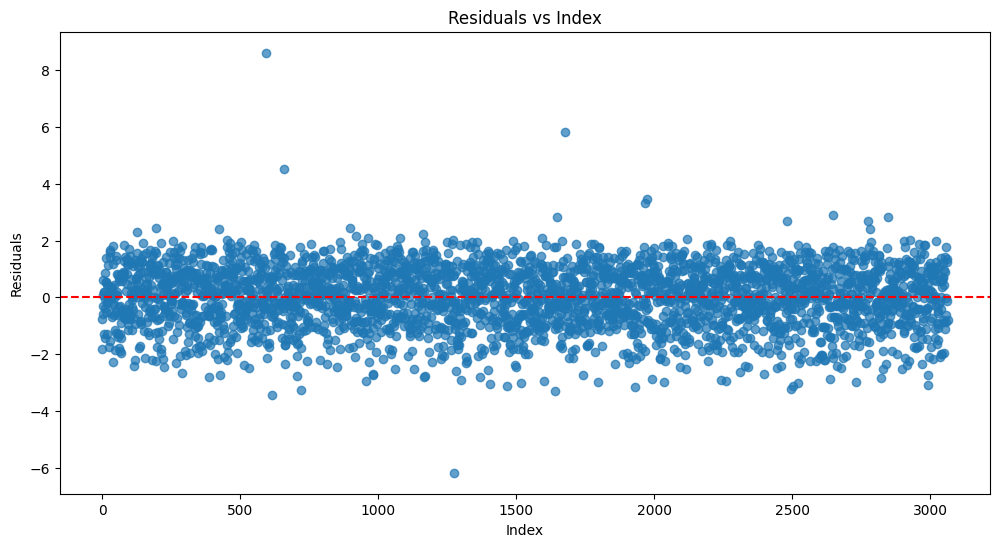

In [22]:
# Plot residuals vs index
plt.figure(figsize=(12, 6))
plt.scatter(range(len(residuals)), residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Index')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.show()


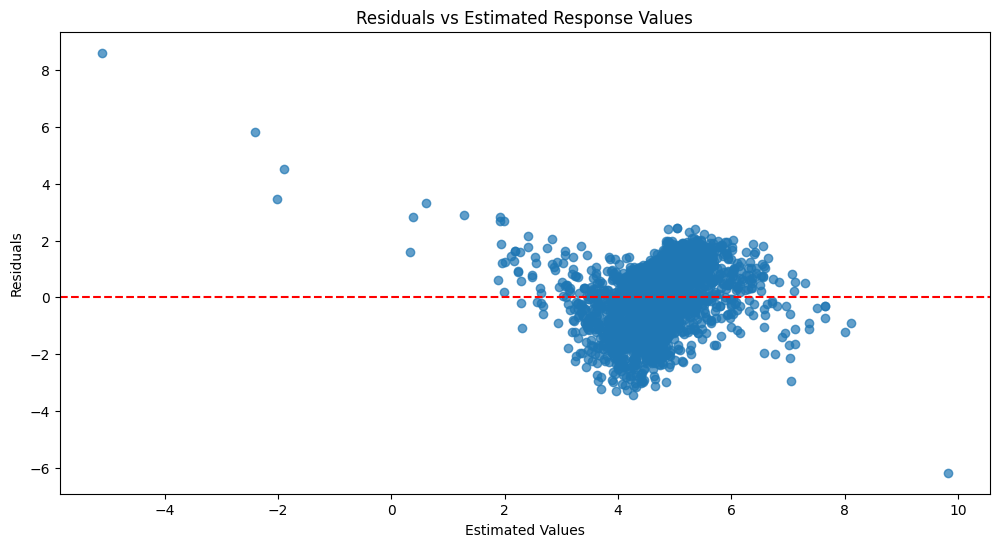

In [23]:
# Residuals vs estimated response values
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Estimated Response Values')
plt.xlabel('Estimated Values')
plt.ylabel('Residuals')
plt.show()

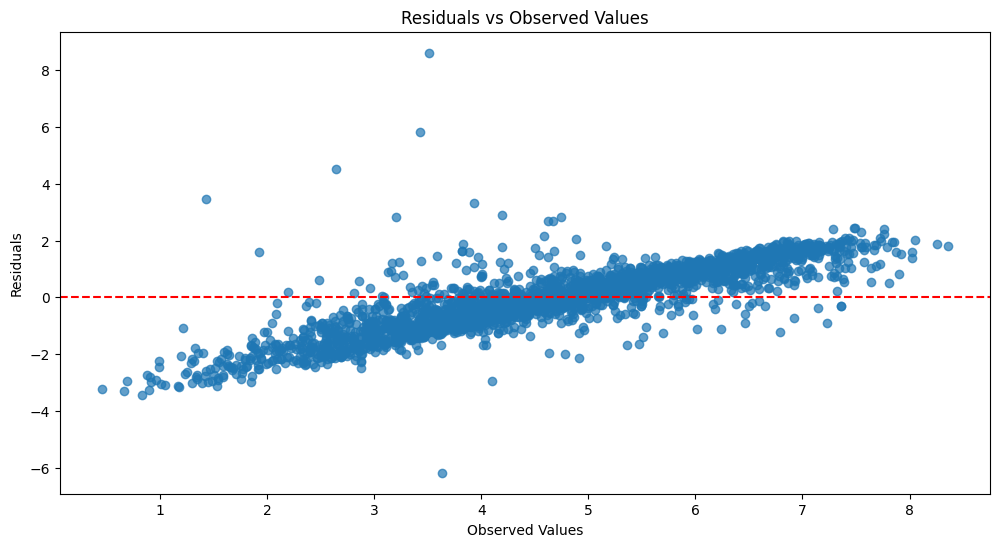

In [24]:
# Residuals vs observations (actual values)
plt.figure(figsize=(12, 6))
plt.scatter(y_test, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Observed Values')
plt.xlabel('Observed Values')
plt.ylabel('Residuals')
plt.show()

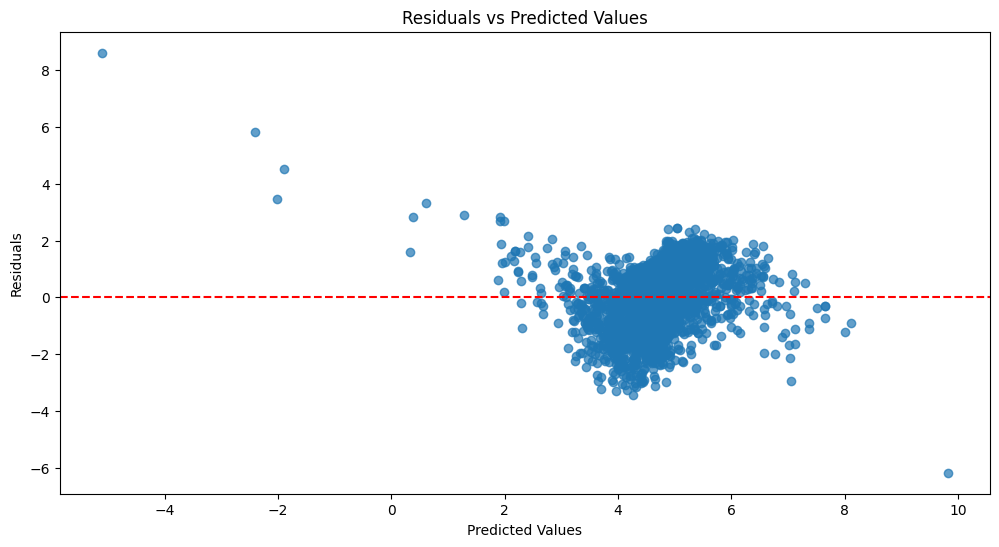

In [25]:
# Residuals vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

-----

#### Pipeline RF

In [26]:
# --- PIPELINE 2: RANDOM FOREST ---
pipeline_rf = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)), 
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))
])

In [27]:
print("\nTreinando o modelo RandomForestRegressor...")
pipeline_rf.fit(X_train, y_train)
print("Modelo RandomForestRegressor treinado com sucesso.")


Treinando o modelo RandomForestRegressor...
Modelo RandomForestRegressor treinado com sucesso.


In [28]:
# 2. Previsões e Métricas (Random Forest)
y_pred_rf = pipeline_rf.predict(X_test)
metrics_rf = {
    'Modelo': 'Random Forest',
    'MAE': mean_absolute_error(y_test, y_pred_rf),
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rf)),
    'MAPE (%)': np.mean(np.abs((y_test - y_pred_rf) / (y_test + 1e-6))) * 100,
    'R²': r2_score(y_test, y_pred_rf)
}
metrics_rf_df= pd.DataFrame([metrics_rf])
metrics_rf_df

,Modelo,MAE,MSE,RMSE,MAPE (%),R²
0,Random Forest,0.189379,0.066434,0.257748,4.746847,0.96613


In [29]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, make_scorer
import numpy as np

In [30]:
# Definir modelo
model = RandomForestRegressor(random_state=42)

In [31]:
# Definir KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
kfold

KFold(n_splits=5, random_state=42, shuffle=True)

In [32]:
# Definir métrica de avaliação
mae_scorer = make_scorer(mean_absolute_error)

In [33]:

# Aplicar validação cruzada
mae_scores = cross_val_score(model, X, y, cv=kfold, scoring=mae_scorer)

In [34]:
print("📊 Validação Cruzada (K-Fold):")
print(f"MAE médio: {mae_scores.mean():.4f}")
print(f"MAE desvio-padrão: {mae_scores.std():.4f}")

📊 Validação Cruzada (K-Fold):
MAE médio: 0.1870
MAE desvio-padrão: 0.0019


In [41]:
# Features e target corretos
feat = df.drop(columns=['total_score','companycode','ano']).columns.to_list()